In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random

import os
import cv2
import matplotlib.image as mpimg

import torch
import torchvision
from time import time
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch import Tensor
from torch.autograd import Variable

In [6]:
directory = '/home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Image Classification/data (2)'
train_folder = directory + '/Training_data'
test_folder = directory + '/Testing_Data'
img_w, img_h = 200, 200

In [8]:
os.listdir(test_folder), os.listdir(train_folder)

(['others', 'driving_license', 'social_security'],
 ['others', 'driving_license', 'social_security'])

In [10]:
ImageFolder(test_folder)

Dataset ImageFolder
    Number of datapoints: 150
    Root location: /home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Image Classification/data (2)/Testing_Data

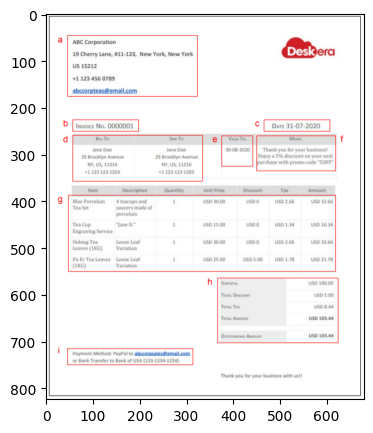

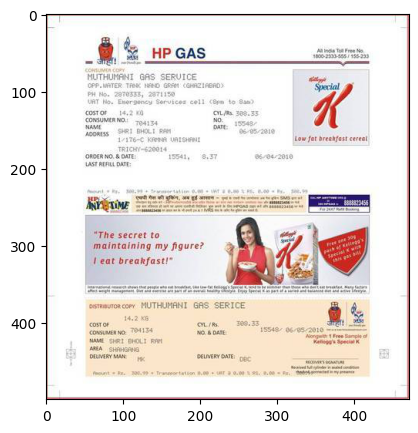

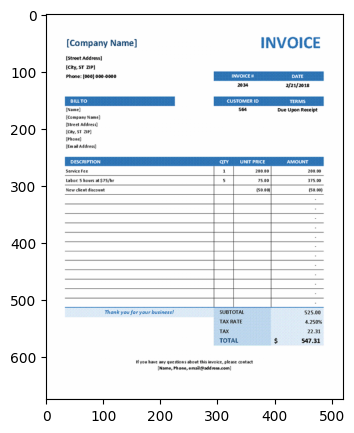

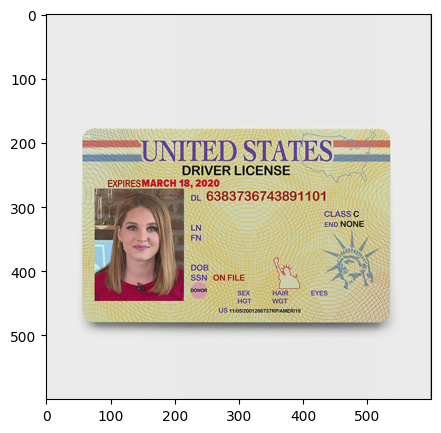

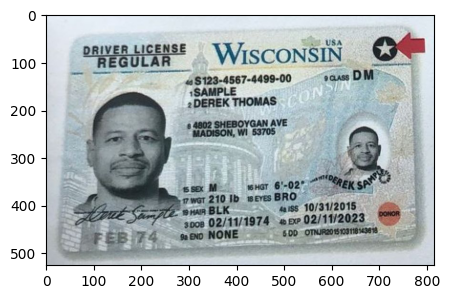

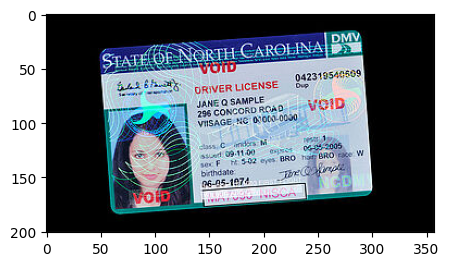

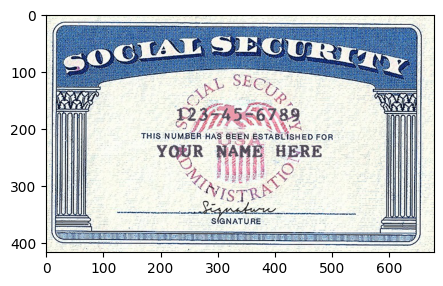

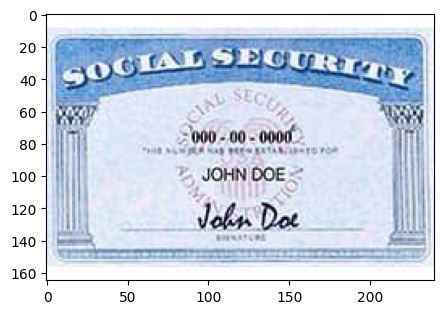

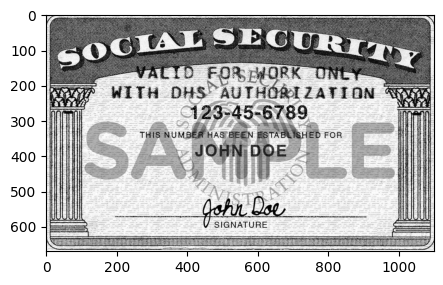

In [13]:
for path in os.listdir(train_folder):
    
    for i in range(3):
    
        temp_path = train_folder + '/' + path
        file = random.choice(os.listdir(temp_path))
        image_path = os.path.join(temp_path, file)
        img = mpimg.imread(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)

In [14]:
for path in os.listdir(train_folder):

    for file in os.listdir(os.path.join(train_folder, path)):

        print(os.path.join(train_folder, path, file))

/home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Image Classification/data (2)/Training_data/others/442.png

/home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Image Classification/data (2)/Training_data/others/499.jpg

/home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Image Classification/data (2)/Training_data/others/445.jpg

/home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Image Classification/data (2)/Training_data/others/509.png

/home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Image Classification/data (2)/Training_data/others/538.png

/home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Image Classification/data (2)/Training_data/others/471.jpg

/home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Image Classification/data (2)/Training_data/others/408.jpg

/home/arunachal/Programming/Projects/Build a CNN Model with PyTorch for Imag

In [15]:
def create_dataset(folder):
    
    img_array, class_name = [], []
    classes = {'driving_license': [1, 0, 0], 'others': [0, 1, 0], 'social_security': [0, 0, 1]}
    
    for path in os.listdir(folder):
        
        for file in os.listdir(os.path.join(folder, path)):
            
            img_path = os.path.join(folder, path, file)
            
            img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (img_h, img_w), interpolation=cv2.INTER_AREA)
            img = np.array(img)
            img = img.astype('float64')
            
            if len(img.shape)==3:
                
                img_array.append(np.array(img).reshape([3, 200, 200]))
                class_name.append(classes[path])
                
    return img_array, class_name

In [16]:
train_img_data, train_class_name = create_dataset(train_folder)
test_img_data, test_class_name = create_dataset(test_folder)

libpng warning: iCCP: known incorrect sRGB profile


In [18]:
len(train_img_data), len(train_class_name), len(test_img_data), len(test_class_name)

(597, 597, 149, 149)

In [20]:
train_class_name[0]

[0, 1, 0]

In [23]:
train = TensorDataset(Tensor(np.array(train_img_data)), Tensor(np.array(train_class_name)))
test = TensorDataset(Tensor(np.array(test_img_data)), Tensor(np.array(test_class_name)))

In [24]:
trainloader = DataLoader(train, batch_size=8, shuffle=True)
testloader = DataLoader(test, batch_size=8, shuffle=True)

In [26]:
images = next(iter(trainloader))

In [36]:
class CNNNet(nn.Module):
    
    def __init__(self):
        
        super(CNNNet, self).__init__()
        
        self.cnn_layers = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2)),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(16, 3, kernel_size=(50, 50), stride=(1, 1)),
        nn.MaxPool2d(kernel_size=1, stride=1, padding=0, ceil_mode=False)
        
        )
        
        self.linear_layers = nn.Sequential(
        nn.Linear(3, 3)
        
        )
        
    def forward(self, x):
        
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers_layers(x)
        
        return x
    
model = CNNNet()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

print(torch.cuda.is_available())

if torch.cuda.is_available():
    model = model.to('cuda')
    criterion = criterion.to('cuda')
    
print(model)         

False

CNNNet(

  (cnn_layers): Sequential(

    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))

    (1): ReLU(inplace=True)

    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

    (3): Conv2d(16, 3, kernel_size=(50, 50), stride=(1, 1))

    (4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)

  )

  (linear_layers): Sequential(

    (0): Linear(in_features=3, out_features=3, bias=True)

  )

)


In [37]:
!export CUDA_LAUNCH_BLOCKING=1

In [38]:
for i in range(10):
    
    running_loss = 0
    model.train()
    
    for images, labels in trainloader:
        
        if torch.cuda.is_available():
            
            images = images.to('cuda')
            labels = labels.to('cuda')
            
        optimizer.zero_grad()
        output = model(images)
        
        loss = criterion(output, labels)        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        
        print('Epoch {} - Training loss: {}'.format(i+1, running_loss/len(trainloader)))

AttributeError: 'CNNNet' object has no attribute 'linear_layers_layers'

In [ ]:
#train this model for 10 epochs
for i in range(10):
    
    running_loss = 0
    model.train() # indicator for training phase
    for images, labels in trainloader:

        if torch.cuda.is_available():
          images = images.to("cuda")
          labels = labels.to("cuda")
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(trainloader)))a